In [760]:
import IPython
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime

from IPython.display import Markdown as md
from IPython.display import Math as m

# Lab Results Table

In [761]:
todayVal = datetime.today()
timeStampStr = todayVal.strftime("%y-%m-%d_%H-%M-%S.%f")

# Content

## Automatic Chi2 Test

In [553]:
from scipy.stats import chi2_contingency
import IPython.display as display
from IPython.display import Markdown as md

def printmd(string):
    IPython.display.display(IPython.display.Markdown(string))

def printChi2Test(df,colName1,colName2,correction=True):
    dfCT = pd.crosstab(df[colName1],df[colName2])
    stat, p, dof, expected = chi2_contingency(dfCT,correction=correction)
    print(f"stat = {stat}")
    print(f"p = {p}")
    print(f"dof = {dof}")
    print(f"expected = {expected}")
    printmd(f"Since p={p:.1g}<0.05, based on Chi2 test we can reject hypothesis that death as outcome does not depend "
       f"on the presence of a renal disease.")

In [554]:
def printChi2(df,text="Empty",correction=True):
    printmd(f"# {text}")
    stat, p, dof, expected = chi2_contingency(df,correction=correction)
    print(f"stat = {stat}")
    print(f"p = {p}")
    print(f"dof = {dof}")
    print(f"expected = {expected}")
    printmd(f"Since p={p:.1g}<0.05, based on  test we can reject hypothesis that death as outcome does not depend "
   f"on the presence of a renal disease.")

In [555]:
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests
def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.05:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'

    return p_text

def chisq_and_posthoc_corrected(df):
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = chi2_contingency(df, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

    # post-hoc
    all_combinations = list(combinations(df.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = df[(df.index == comb[0]) | (df.index == comb[1])]
        chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

In [556]:
%matplotlib inline

# Questions
- Are there differences in outcomes between people who present early (e.g. within 7 days of symptom onset) vs late?

# Data Reading
# Melted

In [557]:
fpMelted="C:\Work\dev\dECMT_src\data_all\COVID19_Data\Preprocessed_Data\df_melted_29092020_ow.csv"
fpMelted="C:\Work\dev\dECMT_src\data_all\COVID19_Data\Preprocessed_Data\df_melted_02102020_ow.csv"
dfMelted = pd.read_csv(fpMelted)

In [558]:
# Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
#        'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
#        'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
#        'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
#        'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
#        'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
#        'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
#        'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
#        'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
#        'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
#        'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
#        'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
#        'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
#        'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',
#        'SYMPTOM_ONSET_DATE', 'ADMISSION_DAY_SINCE_ONSET', 'SPECIMEN_DATE',
#        'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
#        'PARAMETER', 'meanValue'],
#       dtype='object')

In [559]:
dfMelted.columns

Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
       'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
       'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
       'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
       'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
       'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
       'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
       'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
       'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
       'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
       'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',

In [560]:
dfMelted[['SPECIMEN_DATE','SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET']].head()

,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET
0,2020-03-26,0.0,5.0
1,2020-03-27,1.0,6.0
2,2020-03-28,2.0,7.0
3,2020-03-29,3.0,8.0
4,2020-03-30,4.0,9.0


## Etnicity

In [561]:
fpEthinc = "C:\Work\dev\dECMT_src\data_all\COVID19_Data\Current\REACT_Demographics.csv"
# ethnicity
dfEthnic = pd.read_csv(fpEthinc)
dfEthnic.head()
dfEthnic.columns

Index(['STUDY_ID', 'PATIENT_AGE', 'DOB', 'DATE_OF_DEATH', 'DOD_DATE', 'GENDER',
       'ETHNIC_GROUP', 'SMOKING_HISTORY', 'POSTCODE', 'IS_PREGNANT', 'HEIG',
       'WEIG', 'BMI', 'FIRST_POS_DATE', 'FIRST_POS_DATE_R', 'FIRST_POS_TIME_R',
       'ADMIT_DATETIME', 'ADM_DATE_R', 'ADM_TIME_R', 'DISCHARGEDATE',
       'DISCHARGE_DATE_R', 'DISCHARGE_TIME_R', 'LOS', 'LOS_PREPOS', 'READM28',
       'READM_DATETIME', 'READM_DATE', 'READM_TIME'],
      dtype='object')

In [562]:
dfEthnicOnly = dfEthnic[['STUDY_ID','ETHNIC_GROUP']]

In [563]:
len(dfMelted)

264826

In [564]:
dfMelted = pd.merge(dfMelted,dfEthnicOnly,on='STUDY_ID',how='left')
len(dfMelted)

264826

In [565]:
dfMelted['ETHNIC_GROUP'].value_counts()

A    194616
L     14416
Z      7922
C      7140
N      6970
X      5474
S      4522
G      3740
E      3536
H      2652
P      1768
J      1394
D       816
R       340
M       238
B       204
K       204
Name: ETHNIC_GROUP, dtype: int64

In [566]:
dfEthnic.columns

Index(['STUDY_ID', 'PATIENT_AGE', 'DOB', 'DATE_OF_DEATH', 'DOD_DATE', 'GENDER',
       'ETHNIC_GROUP', 'SMOKING_HISTORY', 'POSTCODE', 'IS_PREGNANT', 'HEIG',
       'WEIG', 'BMI', 'FIRST_POS_DATE', 'FIRST_POS_DATE_R', 'FIRST_POS_TIME_R',
       'ADMIT_DATETIME', 'ADM_DATE_R', 'ADM_TIME_R', 'DISCHARGEDATE',
       'DISCHARGE_DATE_R', 'DISCHARGE_TIME_R', 'LOS', 'LOS_PREPOS', 'READM28',
       'READM_DATETIME', 'READM_DATE', 'READM_TIME'],
      dtype='object')

In [567]:
# dfMelted = dfMelted['ETHNIC_GROUP']

In [568]:
dfMelted.head()

,Unnamed: 0,STUDY_ID,ADMISSION_START_DATE,ADMISSION_END_DATE,ITU_START_DATE,ITU_END_DATE,INVASIVE_VENTILATION_START_DATE,INVASIVE_VENTILATION_END_DATE,NIV_START_DATE,NIV_END_DATE,...,IMMUNO,NB_COMOR,SYMPTOM_ONSET_DATE,ADMISSION_DAY_SINCE_ONSET,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue,ETHNIC_GROUP
0,0,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-26,0.0,5.0,ALT,NaN,A
1,1,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-27,1.0,6.0,ALT,NaN,A
2,2,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-28,2.0,7.0,ALT,NaN,A
3,3,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-29,3.0,8.0,ALT,23.0,A
4,4,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-30,4.0,9.0,ALT,NaN,A


In [569]:
dfMelted['READMITTED'].value_counts()

0.0    257618
1.0      7208
Name: READMITTED, dtype: int64

In [570]:
dfMelted['STUDY_ID'].value_counts()

UHSCOVID_1277db7c    4590
UHSCOVID_a567e383    4488
UHSCOVID_beb0ab71    3706
UHSCOVID_6d0785dc    2686
UHSCOVID_b8332747    2618
                     ... 
UHSCOVID_6ac80d6e      34
UHSCOVID_d9e3a801      34
UHSCOVID_d321190c      34
UHSCOVID_bd7219d6      34
UHSCOVID_9914f990      34
Name: STUDY_ID, Length: 651, dtype: int64

In [571]:
len(dfMelted['STUDY_ID'].unique())

651

In [572]:
x=dfMelted['ADMISSION_DAY_SINCE_ONSET'].unique()

In [573]:
y=dfMelted['ADMISSION_DAY_SINCE_ONSET'].value_counts()
y

 0.0     23732
 4.0     21760
 7.0     21148
 14.0    14620
 1.0     10778
         ...  
-22.0      306
-31.0      306
 25.0      272
-26.0      238
 22.0      136
Name: ADMISSION_DAY_SINCE_ONSET, Length: 62, dtype: int64

In [574]:
dfMelted.columns

Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
       'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
       'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
       'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
       'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
       'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
       'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
       'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
       'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
       'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
       'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',

In [575]:
dfMelted['STUDY_ID'].unique().shape


(651,)

In [576]:
dfMelted.shape

(264826, 67)

In [577]:
# type(x)
# plt.plot.hist(x)

In [578]:
dfMelted.columns

Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
       'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
       'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
       'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
       'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
       'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
       'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
       'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
       'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
       'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
       'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',

In [579]:
dfMelted.shape

(264826, 67)

In [580]:
dfMelted['ITU'].value_counts()

0.0    177990
1.0     86836
Name: ITU, dtype: int64

In [581]:
selectedColsUnique = ['STUDY_ID','ADMISSION_START_DATE','ADMISSION_DAY_SINCE_ONSET', 'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE','DEATH_DATE',
'DISCHARGE_DATE', 'DEATH', 'DISCHARGED','SURVIVED','READMITTED']

selectedCols = ['STUDY_ID','ADMISSION_START_DATE','ADMISSION_DAY_SINCE_ONSET',  'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE','DEATH_DATE',
'DISCHARGE_DATE', 'DEATH', 'DISCHARGED','SURVIVED','ITU','NIV','READMITTED','PATIENT_AGE', 'GENDER','ASTHMA', 'COPD','BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR','ETHNIC_GROUP','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue']

In [582]:
dfMeltedUnique = dfMelted.drop_duplicates(selectedColsUnique)[selectedCols]
dfMeltedUnique.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,RHEUMATO_D,DIMENTIA,IMMUNO,NB_COMOR,ETHNIC_GROUP,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0.0,0.0,0.0,4.0,A,2020-03-26,0.0,5.0,ALT,NaN
8,UHSCOVID_00ac1e32,2020-04-07,-4.0,2020-04-11,2020-05-19,NaN,2020-05-19,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,A,2020-04-07,0.0,-4.0,ALT,NaN
51,UHSCOVID_00cb7bdd,2020-04-10,5.0,2020-04-05,2020-04-13,2020-04-13,2020-04-13,1.0,1.0,0.0,...,0.0,0.0,0.0,5.0,A,2020-04-10,0.0,5.0,ALT,25.0
54,UHSCOVID_01add35c,2020-05-22,0.0,2020-05-22,2020-05-23,2020-05-27,2020-05-23,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,A,2020-05-22,0.0,0.0,ALT,8.0
57,UHSCOVID_01f7838d,2020-05-04,-7.0,2020-05-11,2020-05-17,NaN,2020-05-17,0.0,1.0,1.0,...,0.0,0.0,0.0,5.0,A,2020-05-04,0.0,-7.0,ALT,9.0


In [583]:
dfMeltedUnique['NIV'].value_counts()


0.0    545
1.0    106
Name: NIV, dtype: int64

In [584]:
dfMeltedUnique['Death_Discharged_Survived_Str'] = pd.NA
dfMeltedUnique['Death_Discharged_Survived'] = pd.NA
map1= (dfMeltedUnique['DEATH']==0) & (dfMeltedUnique['DISCHARGED']==1) & (dfMeltedUnique['SURVIVED']==1)
dfMeltedUnique.loc[map1,'Death_Discharged_Survived']=0
dfMeltedUnique.loc[map1,'Death_Discharged_Survived_Str'] = 'Survived'

In [585]:
map2= (dfMeltedUnique['DEATH']==1) & (dfMeltedUnique['DISCHARGED']==0) & (dfMeltedUnique['SURVIVED']==0)
dfMeltedUnique.loc[map2,'Death_Discharged_Survived']=1
dfMeltedUnique.loc[map2,'Death_Discharged_Survived_Str'] = 'Died in Hospital'

In [586]:
dfMeltedUnique['Death_Discharged_Survived'].value_counts()


0    428
1      1
Name: Death_Discharged_Survived, dtype: int64

In [587]:
dfMeltedUnique.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived'],
      dtype='object')

In [588]:
map2.sum()

1

In [589]:
dfMeltedUnique['Discharged_Readmitted_Died']="Missing" #"Unknown"
dfMeltedUnique.loc[(dfMeltedUnique['DISCHARGED']==1),'Discharged_Readmitted_Died']= "Discharged"
dfMeltedUnique.loc[(dfMeltedUnique['READMITTED']==1),'Discharged_Readmitted_Died']= "Readmitted"
dfMeltedUnique.loc[(dfMeltedUnique['DEATH']==1),'Discharged_Readmitted_Died']= "Died"

# map3 = (dfMeltedUnique['DEATH']==1) & (dfMeltedUnique['DISCHARGED']==1) & (dfMeltedUnique['SURVIVED']==0)
# dfMeltedUnique.loc[map3,'Discharged_Readmitted_Died']=2
# dfMeltedUnique.loc[map3,'Discharged_Readmitted_Died'] = 'Discharged and Died'

In [590]:
dfMeltedUnique['Discharged_Readmitted_Died'].value_counts()


Discharged    419
Died          216
Readmitted      9
Missing         7
Name: Discharged_Readmitted_Died, dtype: int64

In [591]:
dfMeltedUnique['Discharged_Readmitted_Died'].unique()

array(['Discharged', 'Died', 'Readmitted', 'Missing'], dtype=object)

In [592]:
# Died in Hospital, Died at Home, Survived

In [593]:
dfMeltedUnique['Died_in_Hosp_or_Discharged_or_Survived_Str']=pd.NA

In [594]:
# Died in Hospital, Died at Home, Survived

In [595]:
dfMeltedUnique['Died_or_Survived_Str']=pd.NA

In [596]:
dfMeltedUnique['Died_or_Survived'] = dfMeltedUnique['DEATH']

In [597]:
mapDied= dfMeltedUnique['DEATH']==1
dfMeltedUnique.loc[mapDied,'Died_or_Survived_Str']='Died'

In [598]:
mapSurvived = dfMeltedUnique['DEATH']==0
dfMeltedUnique.loc[mapSurvived,'Died_or_Survived_Str']='Survived'

In [599]:
cc = dfMeltedUnique['Died_or_Survived'].value_counts()
cc

0.0    435
1.0    216
Name: Died_or_Survived, dtype: int64

In [600]:
type(cc)

pandas.core.series.Series

In [601]:
dfMeltedUnique.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue,Death_Discharged_Survived_Str,Death_Discharged_Survived,Discharged_Readmitted_Died,Died_in_Hosp_or_Discharged_or_Survived_Str,Died_or_Survived_Str,Died_or_Survived
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0.0,5.0,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0
8,UHSCOVID_00ac1e32,2020-04-07,-4.0,2020-04-11,2020-05-19,NaN,2020-05-19,0.0,1.0,1.0,...,0.0,-4.0,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0
51,UHSCOVID_00cb7bdd,2020-04-10,5.0,2020-04-05,2020-04-13,2020-04-13,2020-04-13,1.0,1.0,0.0,...,0.0,5.0,ALT,25.0,<NA>,<NA>,Died,<NA>,Died,1.0
54,UHSCOVID_01add35c,2020-05-22,0.0,2020-05-22,2020-05-23,2020-05-27,2020-05-23,1.0,1.0,0.0,...,0.0,0.0,ALT,8.0,<NA>,<NA>,Died,<NA>,Died,1.0
57,UHSCOVID_01f7838d,2020-05-04,-7.0,2020-05-11,2020-05-17,NaN,2020-05-17,0.0,1.0,1.0,...,0.0,-7.0,ALT,9.0,Survived,0,Discharged,<NA>,Survived,0.0


In [602]:
dfMeltedUnique.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
       'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
       'Died_or_Survived'],
      dtype='object')

In [603]:
dfMeltedUnique['PATIENT_AGE']

0       64.0
8       73.0
51      76.0
54      67.0
57      97.0
        ... 
7754    47.0
7759    70.0
7764    67.0
7778    88.0
7787    57.0
Name: PATIENT_AGE, Length: 651, dtype: float64

In [604]:
# dictPresenterType3C = {'(-7,0] Early':0,'>7days Late':1,'<0 days (Hospital)':2}
dictPresenterType3C = {'Early Presenters':0,'Late Presenters':1,'Hospital Equired':2}
dictPresenterType3CReversed = {v:k for k,v in dictPresenterType3C.items()}
dictPresenterType3CReversed

{0: 'Early Presenters', 1: 'Late Presenters', 2: 'Hospital Equired'}

In [605]:
dfMeltedUnique['Onset Time']=pd.NA
dfMeltedUnique['Symptoms onset']='Unknown'

In [606]:
mp1= (dfMeltedUnique['ADMISSION_DAY_SINCE_ONSET']<=7) & (dfMeltedUnique['ADMISSION_DAY_SINCE_ONSET']>=0)
epS = 'Early Presenters'
epVal = dictPresenterType3C.get(epS)
dfMeltedUnique.loc[mp1,'Onset Time'] = epVal
dfMeltedUnique.loc[mp1,'Symptoms onset']= dictPresenterType3CReversed[epVal]

In [607]:
#{'Early Presenters':0,'Late Presenters':1,'Hospital Equired':2}

In [608]:
mp2= (dfMeltedUnique['ADMISSION_DAY_SINCE_ONSET']>7)
epS = 'Late Presenters'
epVal = dictPresenterType3C.get(epS)
dfMeltedUnique.loc[mp2,'Onset Time'] = epVal
dfMeltedUnique.loc[mp2,'Symptoms onset']= dictPresenterType3CReversed[epVal]

In [609]:
mp3= dfMeltedUnique['ADMISSION_DAY_SINCE_ONSET']<0
epS = 'Hospital Equired'
epVal = dictPresenterType3C.get(epS)
dfMeltedUnique.loc[mp3,'Onset Time'] = epVal
dfMeltedUnique.loc[mp3,'Symptoms onset']= dictPresenterType3CReversed[epVal]

In [610]:
dfMeltedUnique['Symptoms onset'].value_counts()

Early Presenters    349
Hospital Equired    123
Late Presenters     111
Unknown              68
Name: Symptoms onset, dtype: int64

In [611]:
dfMeltedUnique.shape

(651, 47)

In [612]:
dfMeltedUnique.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,PARAMETER,meanValue,Death_Discharged_Survived_Str,Death_Discharged_Survived,Discharged_Readmitted_Died,Died_in_Hosp_or_Discharged_or_Survived_Str,Died_or_Survived_Str,Died_or_Survived,Onset Time,Symptoms onset
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0,0,Early Presenters
8,UHSCOVID_00ac1e32,2020-04-07,-4.0,2020-04-11,2020-05-19,NaN,2020-05-19,0.0,1.0,1.0,...,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0,2,Hospital Equired
51,UHSCOVID_00cb7bdd,2020-04-10,5.0,2020-04-05,2020-04-13,2020-04-13,2020-04-13,1.0,1.0,0.0,...,ALT,25.0,<NA>,<NA>,Died,<NA>,Died,1.0,0,Early Presenters
54,UHSCOVID_01add35c,2020-05-22,0.0,2020-05-22,2020-05-23,2020-05-27,2020-05-23,1.0,1.0,0.0,...,ALT,8.0,<NA>,<NA>,Died,<NA>,Died,1.0,0,Early Presenters
57,UHSCOVID_01f7838d,2020-05-04,-7.0,2020-05-11,2020-05-17,NaN,2020-05-17,0.0,1.0,1.0,...,ALT,9.0,Survived,0,Discharged,<NA>,Survived,0.0,2,Hospital Equired


In [613]:
dfMeltedUnique.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
       'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
       'Died_or_Survived', 'Onset Time', 'Symptoms onset'],
      dtype='object')

# Died or Survived

In [614]:
# Groupping
dfMeltedUnique.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
       'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
       'Died_or_Survived', 'Onset Time', 'Symptoms onset'],
      dtype='object')

In [615]:
# dfSel
# colSelected = ['STUDY_ID','ADMISSION_START_DATE','ETHNIC_GROUP', 'Symptoms onset', 'Died_or_Survived_Str','Discharged_Readmitted_Died','NIV',
#                'PATIENT_AGE', 'GENDER','ASTHMA', 'COPD','BRONCHIECTASIS',
#        'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
#        'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
#        'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
#        'PARAMETER', 'meanValue']
# dfSel = dfMeltedUnique[colSelected]
dfSel = dfMeltedUnique
dfSel.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,PARAMETER,meanValue,Death_Discharged_Survived_Str,Death_Discharged_Survived,Discharged_Readmitted_Died,Died_in_Hosp_or_Discharged_or_Survived_Str,Died_or_Survived_Str,Died_or_Survived,Onset Time,Symptoms onset
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0,0,Early Presenters
8,UHSCOVID_00ac1e32,2020-04-07,-4.0,2020-04-11,2020-05-19,NaN,2020-05-19,0.0,1.0,1.0,...,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0,2,Hospital Equired
51,UHSCOVID_00cb7bdd,2020-04-10,5.0,2020-04-05,2020-04-13,2020-04-13,2020-04-13,1.0,1.0,0.0,...,ALT,25.0,<NA>,<NA>,Died,<NA>,Died,1.0,0,Early Presenters
54,UHSCOVID_01add35c,2020-05-22,0.0,2020-05-22,2020-05-23,2020-05-27,2020-05-23,1.0,1.0,0.0,...,ALT,8.0,<NA>,<NA>,Died,<NA>,Died,1.0,0,Early Presenters
57,UHSCOVID_01f7838d,2020-05-04,-7.0,2020-05-11,2020-05-17,NaN,2020-05-17,0.0,1.0,1.0,...,ALT,9.0,Survived,0,Discharged,<NA>,Survived,0.0,2,Hospital Equired


# Lab Results
dfSel.columns()

In [616]:
dfMelted.columns

Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
       'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
       'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
       'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
       'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
       'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
       'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
       'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
       'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
       'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
       'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',

In [617]:
# 'SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET','PARAMETER', 'meanValue',
# 'ETHNIC_GROUP'

In [618]:
dfMelted[['STUDY_ID','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue']]

,STUDY_ID,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue
0,UHSCOVID_00989a42,2020-03-26,0.0,5.0,ALT,NaN
1,UHSCOVID_00989a42,2020-03-27,1.0,6.0,ALT,NaN
2,UHSCOVID_00989a42,2020-03-28,2.0,7.0,ALT,NaN
3,UHSCOVID_00989a42,2020-03-29,3.0,8.0,ALT,23.0
4,UHSCOVID_00989a42,2020-03-30,4.0,9.0,ALT,NaN
...,...,...,...,...,...,...
264821,UHSCOVID_fe8c3d54,2020-04-13,11.0,4.0,Tidal Volume Expiratory,NaN
264822,UHSCOVID_fe8c3d54,2020-04-16,14.0,7.0,Tidal Volume Expiratory,NaN
264823,UHSCOVID_fe8c3d54,2020-04-18,16.0,9.0,Tidal Volume Expiratory,NaN
264824,UHSCOVID_ffd435ad,2020-03-31,-1.0,NaN,Tidal Volume Expiratory,NaN


In [619]:
dfMelted[['STUDY_ID','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue']].head()

,STUDY_ID,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue
0,UHSCOVID_00989a42,2020-03-26,0.0,5.0,ALT,NaN
1,UHSCOVID_00989a42,2020-03-27,1.0,6.0,ALT,NaN
2,UHSCOVID_00989a42,2020-03-28,2.0,7.0,ALT,NaN
3,UHSCOVID_00989a42,2020-03-29,3.0,8.0,ALT,23.0
4,UHSCOVID_00989a42,2020-03-30,4.0,9.0,ALT,NaN


In [620]:
dfSel[['STUDY_ID','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue']].head()

,STUDY_ID,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue
0,UHSCOVID_00989a42,2020-03-26,0.0,5.0,ALT,NaN
8,UHSCOVID_00ac1e32,2020-04-07,0.0,-4.0,ALT,NaN
51,UHSCOVID_00cb7bdd,2020-04-10,0.0,5.0,ALT,25.0
54,UHSCOVID_01add35c,2020-05-22,0.0,0.0,ALT,8.0
57,UHSCOVID_01f7838d,2020-05-04,0.0,-7.0,ALT,9.0


## Read Data

In [621]:
fpLabs  = "C:\Work\dev\dECMT_src\data_all\COVID19_Data\REACT_LabResults.csv"
dfLabs = pd.read_csv(fpLabs)

In [622]:
dfLabs.head()

,STUDY_ID,PATHOLOGY_SPECIMEN_DATE,SPECIMEN_DATE,SPECIMEN_TIME,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
0,UHSCOVID_af837150,2020-03-29 14:35:00,29/03/2020,14:35:00,POTASSIUM,4.2,3.5,5.3,mmol/L
1,UHSCOVID_af837150,2020-03-30 10:54:00,30/03/2020,10:54:00,POTASSIUM,4.2,3.5,5.3,mmol/L
2,UHSCOVID_af837150,2020-04-05 13:45:00,05/04/2020,13:45:00,ALT,14.0,7.0,35.0,units/L
3,UHSCOVID_af837150,2020-04-09 09:00:00,09/04/2020,09:00:00,BILIRUBIN,7.0,0.0,20.0,umol/L
4,UHSCOVID_af837150,2020-04-13 08:41:00,13/04/2020,08:41:00,UREA,5.5,2.5,7.8,mmol/L


In [623]:
dfLabs.columns

Index(['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE', 'SPECIMEN_TIME',
       'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
       'UPPER_RANGE', 'UNIT'],
      dtype='object')

In [624]:
dfLabs.describe()

,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE
count,77890.000000,68051.000000,68051.000000
mean,103.741095,36.408851,77.943000
std,364.711338,59.601959,122.413345
min,0.000000,0.000000,0.500000
25%,5.400000,2.000000,7.000000
50%,10.000000,3.000000,7.800000
75%,90.000000,53.000000,115.000000
max,34607.000000,225.000000,425.000000


In [625]:
dfLabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77890 entries, 0 to 77889
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDY_ID                  77890 non-null  object 
 1   PATHOLOGY_SPECIMEN_DATE   77890 non-null  object 
 2   SPECIMEN_DATE             77890 non-null  object 
 3   SPECIMEN_TIME             77890 non-null  object 
 4   REACT_TESTCODE            77890 non-null  object 
 5   PATHOLOGY_RESULT_NUMERIC  77890 non-null  float64
 6   LOWER_RANGE               68051 non-null  float64
 7   UPPER_RANGE               68051 non-null  float64
 8   UNIT                      75588 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.3+ MB


In [626]:
labParNames = dfLabs['REACT_TESTCODE'].unique()
labParNames

array(['POTASSIUM', 'ALT', 'BILIRUBIN', 'UREA', 'CREATENINE', 'SODIUM',
       'CRP', 'NEUTROPHILS', 'EOSINOPHILS', 'HB', 'LYMPHOCYTES', 'WBC',
       'PLATELETS', 'GLUCOSE', 'TRIGYCERIN', 'FERRITIN', 'AST',
       'TROPONIN', 'LDH', 'D_DIMER'], dtype=object)

In [627]:
# dfAdmDate = dfSel[['STUDY_ID', 'ADMISSION_START_DATE']]
# dfAdmDate

In [628]:
dfLabAll = pd.merge(dfMeltedUnique,dfLabs,on='STUDY_ID',how='left')
dfLabAll.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,Onset Time,Symptoms onset,PATHOLOGY_SPECIMEN_DATE,SPECIMEN_DATE_y,SPECIMEN_TIME,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0,Early Presenters,2020-03-29 00:00:00,29/03/2020,00:00:00,CREATENINE,63.0,80.0,115.0,mmol/L
1,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0,Early Presenters,2020-04-01 13:42:00,01/04/2020,13:42:00,PLATELETS,371.0,150.0,400.0,10E9/L
2,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0,Early Presenters,2020-03-26 21:52:00,26/03/2020,21:52:00,GLUCOSE,13.3,NaN,NaN,mmol/L
3,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0,Early Presenters,2020-03-27 16:47:00,27/03/2020,16:47:00,GLUCOSE,12.7,NaN,NaN,mmol/L
4,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0,Early Presenters,2020-03-27 06:28:00,27/03/2020,06:28:00,GLUCOSE,7.8,NaN,NaN,mmol/L


In [629]:
# ['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
#        'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
#        'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
#        'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
#        'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
#        'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
#        'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
#        'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE_x',
#        'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
#        'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
#        'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
#        'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
#        'Died_or_Survived', 'Onset Time', 'Symptoms onset',
#        'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE_y', 'SPECIMEN_TIME',
#        'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
#        'UPPER_RANGE', 'UNIT'],
dfLabAll.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE_x',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
       'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
       'Died_or_Survived', 'Onset Time', 'Symptoms onset',
       'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE_y', 'SPECIMEN_TIME',
       'REACT_TESTCODE', 'PATHOLOGY_RESUL

In [630]:
selected= ['STUDY_ID',  'ADMISSION_START_DATE','ADMISSION_DAY_SINCE_ONSET','SPECIMEN_TIME',
       'Symptoms onset',
       'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE_y', 'SPECIMEN_TIME',
       'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
       'UPPER_RANGE', 'UNIT']
dfLabAllSel = dfLabAll[selected]
dfLabAllSel.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SPECIMEN_TIME', 'Symptoms onset', 'PATHOLOGY_SPECIMEN_DATE',
       'SPECIMEN_DATE_y', 'SPECIMEN_TIME', 'REACT_TESTCODE',
       'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE', 'UPPER_RANGE', 'UNIT'],
      dtype='object')

In [631]:
dateCols = ['ADMISSION_START_DATE','PATHOLOGY_SPECIMEN_DATE']
dfLabAllSel[dateCols] = dfLabAllSel[dateCols].apply(pd.to_datetime)

C:\ANACONDA3\envs\dECMT\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### 'Days_Lab_Since_Adm'

In [632]:
labName = 'ALT'
# --------------------
dfLabAllSel['Days_Lab_Since_Adm'] = (dfLabAllSel['PATHOLOGY_SPECIMEN_DATE'] - dfLabAllSel['ADMISSION_START_DATE'] ).dt.days
dfLabAllSel['Days_Lab_Since_Adm'].value_counts()

C:\ANACONDA3\envs\dECMT\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3.0      5436
2.0      5394
1.0      5389
4.0      4824
5.0      4393
         ... 
65.0        2
64.0        2
68.0        2
63.0        2
148.0       1
Name: Days_Lab_Since_Adm, Length: 102, dtype: int64

In [633]:
dfLabAllSel.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SPECIMEN_TIME', 'Symptoms onset', 'PATHOLOGY_SPECIMEN_DATE',
       'SPECIMEN_DATE_y', 'SPECIMEN_TIME', 'REACT_TESTCODE',
       'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE', 'UPPER_RANGE', 'UNIT',
       'Days_Lab_Since_Adm'],
      dtype='object')

In [634]:
selCols = ['STUDY_ID',  'ADMISSION_DAY_SINCE_ONSET','Days_Lab_Since_Adm','SPECIMEN_TIME',
       'Symptoms onset', 'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC',
       'LOWER_RANGE', 'UPPER_RANGE', 'UNIT' ]
dfLabAllSel = dfLabAllSel[selCols]
dfLabAllSel.columns

Index(['STUDY_ID', 'ADMISSION_DAY_SINCE_ONSET', 'Days_Lab_Since_Adm',
       'SPECIMEN_TIME', 'SPECIMEN_TIME', 'Symptoms onset', 'REACT_TESTCODE',
       'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE', 'UPPER_RANGE', 'UNIT'],
      dtype='object')

In [635]:
dfLabAllSel.head()

,STUDY_ID,ADMISSION_DAY_SINCE_ONSET,Days_Lab_Since_Adm,SPECIMEN_TIME,SPECIMEN_TIME,Symptoms onset,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
0,UHSCOVID_00989a42,5.0,3.0,00:00:00,00:00:00,Early Presenters,CREATENINE,63.0,80.0,115.0,mmol/L
1,UHSCOVID_00989a42,5.0,6.0,13:42:00,13:42:00,Early Presenters,PLATELETS,371.0,150.0,400.0,10E9/L
2,UHSCOVID_00989a42,5.0,0.0,21:52:00,21:52:00,Early Presenters,GLUCOSE,13.3,NaN,NaN,mmol/L
3,UHSCOVID_00989a42,5.0,1.0,16:47:00,16:47:00,Early Presenters,GLUCOSE,12.7,NaN,NaN,mmol/L
4,UHSCOVID_00989a42,5.0,1.0,06:28:00,06:28:00,Early Presenters,GLUCOSE,7.8,NaN,NaN,mmol/L


In [636]:
dfLabAllSel.shape

(78059, 11)

In [637]:
dfLabAllSel[['UNIT','REACT_TESTCODE']].value_counts()

UNIT     REACT_TESTCODE
mmol/L   GLUCOSE           19316
         SODIUM             4117
         CREATENINE         4113
         UREA               4109
10E9/L   WBC                4057
g/L      HB                 4057
10E9/L   PLATELETS          4048
         NEUTROPHILS        4007
         LYMPHOCYTES        4006
         EOSINOPHILS        4003
mmol/L   POTASSIUM          3983
mg/L     CRP                3880
umol/L   BILIRUBIN          3052
units/L  ALT                3011
         LDH                1614
ng/L     FERRITIN           1589
         TROPONIN           1519
units/L  AST                1107
dtype: int64

In [638]:
dfLabAllSel['Days_Lab_Since_Adm'].value_counts()

3.0      5436
2.0      5394
1.0      5389
4.0      4824
5.0      4393
         ... 
65.0        2
64.0        2
68.0        2
63.0        2
148.0       1
Name: Days_Lab_Since_Adm, Length: 102, dtype: int64

In [639]:
dfLabAllSel['Days_Lab_Since_Adm'].unique()

array([  3.,   6.,   0.,   1.,   4.,   5.,   2.,   7.,   8.,   9.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  20.,  21.,  23.,  24.,  26.,
        28.,  34.,  31.,  35.,  10.,  11.,  29.,  30.,  38.,  22.,  19.,
        25.,  32.,  27.,  33.,  36.,  37.,  nan,  39.,  40.,  48.,  44.,
        46.,  47.,  51.,  45.,  49.,  41.,  52.,  50.,  43.,  42.,  53.,
        87.,  57.,  96.,  97.,  98., 101., 105.,  55.,  76.,  70.,  61.,
        54.,  59.,  71.,  74.,  58.,  65.,  73.,  56.,  63.,  67.,  68.,
        69.,  62.,  72.,  66.,  60.,  64.,  77.,  86.,  89., 113., 124.,
       130., 135., 140., 159.,  75., 106., 128., 133., 147., 156., 154.,
       161., 168., 148.,  92.])

In [640]:
dfLabAllSelAD = dfLabAllSel[dfLabAllSel['Days_Lab_Since_Adm']<=1]
dfLabAllSelAD.head()

,STUDY_ID,ADMISSION_DAY_SINCE_ONSET,Days_Lab_Since_Adm,SPECIMEN_TIME,SPECIMEN_TIME,Symptoms onset,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
2,UHSCOVID_00989a42,5.0,0.0,21:52:00,21:52:00,Early Presenters,GLUCOSE,13.3,NaN,NaN,mmol/L
3,UHSCOVID_00989a42,5.0,1.0,16:47:00,16:47:00,Early Presenters,GLUCOSE,12.7,NaN,NaN,mmol/L
4,UHSCOVID_00989a42,5.0,1.0,06:28:00,06:28:00,Early Presenters,GLUCOSE,7.8,NaN,NaN,mmol/L
11,UHSCOVID_00989a42,5.0,1.0,01:06:00,01:06:00,Early Presenters,GLUCOSE,12.4,3.0,7.0,mmol/L
39,UHSCOVID_00989a42,5.0,1.0,11:45:00,11:45:00,Early Presenters,GLUCOSE,11.3,NaN,NaN,mmol/L


In [641]:
dfLabAllSelAD.shape

(6306, 11)

In [742]:
labParNames = dfLabAllSel['REACT_TESTCODE'].unique()
labParNames = [x for x in labParNames if str(x) != 'nan']
labParNames

['CREATENINE',
 'PLATELETS',
 'GLUCOSE',
 'UREA',
 'CRP',
 'FERRITIN',
 'D_DIMER',
 'SODIUM',
 'TROPONIN',
 'HB',
 'EOSINOPHILS',
 'WBC',
 'BILIRUBIN',
 'NEUTROPHILS',
 'POTASSIUM',
 'LYMPHOCYTES',
 'ALT',
 'LDH',
 'AST',
 'TRIGYCERIN']

In [643]:
dfLabAllSel['Symptoms onset'].value_counts()

Early Presenters    33026
Hospital Equired    20812
Late Presenters     17723
Unknown              6498
Name: Symptoms onset, dtype: int64

In [644]:
dfLabAllSelNoUnknownHospitals = dfLabAllSel.drop(dfLabAllSel[(dfLabAllSel['Symptoms onset']=="Unknown") |
                                                       (dfLabAllSel['Symptoms onset']== "Hospital Equired") ].index)

# dfLabAllSelNoUnknownHospitals = dfLabAllSelNoUnknownHospitals.drop(dfLabAllSelNoUnknownHospitals[
#                                                                        (dfLabAllSelNoUnknownHospitals['Symptoms onset']== "Hospital Equired")].index)

dfLabAllSelNoUnknownHospitals.head()

,STUDY_ID,ADMISSION_DAY_SINCE_ONSET,Days_Lab_Since_Adm,SPECIMEN_TIME,SPECIMEN_TIME,Symptoms onset,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
0,UHSCOVID_00989a42,5.0,3.0,00:00:00,00:00:00,Early Presenters,CREATENINE,63.0,80.0,115.0,mmol/L
1,UHSCOVID_00989a42,5.0,6.0,13:42:00,13:42:00,Early Presenters,PLATELETS,371.0,150.0,400.0,10E9/L
2,UHSCOVID_00989a42,5.0,0.0,21:52:00,21:52:00,Early Presenters,GLUCOSE,13.3,NaN,NaN,mmol/L
3,UHSCOVID_00989a42,5.0,1.0,16:47:00,16:47:00,Early Presenters,GLUCOSE,12.7,NaN,NaN,mmol/L
4,UHSCOVID_00989a42,5.0,1.0,06:28:00,06:28:00,Early Presenters,GLUCOSE,7.8,NaN,NaN,mmol/L


In [645]:
dfLabAllSelNoUnknownHospitals['Symptoms onset'].value_counts()

Early Presenters    33026
Late Presenters     17723
Name: Symptoms onset, dtype: int64

In [649]:
labName='ALT'
mapLabR = dfLabAllSelNoUnknownHospitals['REACT_TESTCODE']==labName
dfAlt = dfLabAllSelNoUnknownHospitals[mapLabR]
dfAlt

,STUDY_ID,ADMISSION_DAY_SINCE_ONSET,Days_Lab_Since_Adm,SPECIMEN_TIME,SPECIMEN_TIME,Symptoms onset,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
43,UHSCOVID_00989a42,5.0,3.0,00:00:00,00:00:00,Early Presenters,ALT,23.0,10.0,40.0,units/L
499,UHSCOVID_00cb7bdd,5.0,2.0,00:00:00,00:00:00,Early Presenters,ALT,27.0,7.0,35.0,units/L
509,UHSCOVID_00cb7bdd,5.0,1.0,00:00:00,00:00:00,Early Presenters,ALT,22.0,7.0,35.0,units/L
635,UHSCOVID_025d562e,1.0,1.0,20:31:00,20:31:00,Early Presenters,ALT,44.0,7.0,35.0,units/L
680,UHSCOVID_037e2bce,5.0,4.0,00:00:00,00:00:00,Early Presenters,ALT,188.0,10.0,40.0,units/L
...,...,...,...,...,...,...,...,...,...,...,...
77870,UHSCOVID_fd893360,0.0,3.0,11:21:00,11:21:00,Early Presenters,ALT,16.0,7.0,35.0,units/L
77873,UHSCOVID_fd893360,0.0,10.0,09:27:00,09:27:00,Early Presenters,ALT,8.0,7.0,35.0,units/L
77911,UHSCOVID_fd893360,0.0,15.0,15:15:00,15:15:00,Early Presenters,ALT,7.0,7.0,35.0,units/L
77921,UHSCOVID_fd893360,0.0,2.0,10:16:00,10:16:00,Early Presenters,ALT,7.0,7.0,35.0,units/L


In [650]:
dfAlt["PATHOLOGY_RESULT_NUMERIC"].mean()

61.400200601805416

In [651]:
dfAlt["PATHOLOGY_RESULT_NUMERIC"].sd

AttributeError: 'Series' object has no attribute 'sd'

In [652]:
dfAlt.head()

,STUDY_ID,ADMISSION_DAY_SINCE_ONSET,Days_Lab_Since_Adm,SPECIMEN_TIME,SPECIMEN_TIME,Symptoms onset,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
43,UHSCOVID_00989a42,5.0,3.0,00:00:00,00:00:00,Early Presenters,ALT,23.0,10.0,40.0,units/L
499,UHSCOVID_00cb7bdd,5.0,2.0,00:00:00,00:00:00,Early Presenters,ALT,27.0,7.0,35.0,units/L
509,UHSCOVID_00cb7bdd,5.0,1.0,00:00:00,00:00:00,Early Presenters,ALT,22.0,7.0,35.0,units/L
635,UHSCOVID_025d562e,1.0,1.0,20:31:00,20:31:00,Early Presenters,ALT,44.0,7.0,35.0,units/L
680,UHSCOVID_037e2bce,5.0,4.0,00:00:00,00:00:00,Early Presenters,ALT,188.0,10.0,40.0,units/L


In [653]:
dfLabAllSelNoUnknownHospitals['REACT_TESTCODE'].value_counts()

GLUCOSE        13471
SODIUM          2425
CREATENINE      2422
UREA            2421
WBC             2396
HB              2396
NEUTROPHILS     2392
PLATELETS       2392
LYMPHOCYTES     2390
EOSINOPHILS     2387
POTASSIUM       2348
CRP             2323
BILIRUBIN       2019
ALT             1994
FERRITIN        1331
LDH             1283
TROPONIN        1280
D_DIMER         1053
AST              970
TRIGYCERIN       939
Name: REACT_TESTCODE, dtype: int64

In [654]:
dfAlt.columns

Index(['STUDY_ID', 'ADMISSION_DAY_SINCE_ONSET', 'Days_Lab_Since_Adm',
       'SPECIMEN_TIME', 'SPECIMEN_TIME', 'Symptoms onset', 'REACT_TESTCODE',
       'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE', 'UPPER_RANGE', 'UNIT'],
      dtype='object')

In [655]:
unitName = dfAlt['UNIT'].iloc[0]

In [656]:
dfAlt.columns

Index(['STUDY_ID', 'ADMISSION_DAY_SINCE_ONSET', 'Days_Lab_Since_Adm',
       'SPECIMEN_TIME', 'SPECIMEN_TIME', 'Symptoms onset', 'REACT_TESTCODE',
       'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE', 'UPPER_RANGE', 'UNIT'],
      dtype='object')

In [659]:
grp1 = dfAlt.groupby('Symptoms onset').agg(Mean_Lab = ("PATHOLOGY_RESULT_NUMERIC",'mean'),Std_Lab = ("PATHOLOGY_RESULT_NUMERIC",'std'))
grp1

,Mean_Lab,Std_Lab
Symptoms onset,,
Early Presenters,56.577967,104.133441
Late Presenters,70.217021,73.701022


In [661]:
type(grp1)

pandas.core.frame.DataFrame

In [658]:
labParNames

array(['CREATENINE', 'PLATELETS', 'GLUCOSE', 'UREA', 'CRP', 'FERRITIN',
       'D_DIMER', 'SODIUM', 'TROPONIN', 'HB', 'EOSINOPHILS', 'WBC',
       'BILIRUBIN', 'NEUTROPHILS', 'POTASSIUM', 'LYMPHOCYTES', 'ALT',
       'LDH', 'AST', 'TRIGYCERIN', nan], dtype=object)

#### single run

In [709]:
labName='ALT'
outTable = pd.DataFrame(columns=['PARAMETER','LATE','EARLY'])
print("Empty Dataframe ", outTable, sep='\n')
print("====================================================")
mapLabR = dfLabAllSelNoUnknownHospitals['REACT_TESTCODE']==labName
dfAlt = dfLabAllSelNoUnknownHospitals[mapLabR]
grp2 = dfAlt.groupby('Symptoms onset').agg(Mean_Lab = ("PATHOLOGY_RESULT_NUMERIC",'mean'),Std_Lab = ("PATHOLOGY_RESULT_NUMERIC",'std'))
# ------------------------------------------------
lpMean = grp2.loc['Late Presenters','Mean_Lab']
lpStd = grp2.loc['Late Presenters','Std_Lab']
# ------------------------------------------------
epMean = grp2.loc['Early Presenters','Mean_Lab']
epStd = grp2.loc['Early Presenters','Std_Lab']
# ------------------------------------------------
print(f"lpMean = {lpMean}")
print(f"lpStd = {lpStd}")
print(grp2.index)
print("----------------------------------------------------")
print(grp2.info)
print("----------------------------------------------------")
# lpMean = grp2.loc['Late Presenters ','Mean_Lab']
# print(lpMean)
print(grp2)
print("----------------------------------------------------")
print(grp2.columns)
print("====================================================")

outTable = outTable.append({'PARAMETER':labName,'LATE':f"{lpMean:n} ({lpStd:n})",'EARLY':f"{epMean:n} ({epStd:n})"}, ignore_index=True)
print("Dataframe Contens ", outTable, sep='\n')
print("====================================================")
outTable.head()

Empty Dataframe 
Empty DataFrame
Columns: [PARAMETER, LATE, EARLY]
Index: []
lpMean = 70.21702127659574
lpStd = 73.70102183114909
Index(['Early Presenters', 'Late Presenters'], dtype='object', name='Symptoms onset')
----------------------------------------------------
<bound method DataFrame.info of                    Mean_Lab     Std_Lab
Symptoms onset                         
Early Presenters  56.577967  104.133441
Late Presenters   70.217021   73.701022>
----------------------------------------------------
                   Mean_Lab     Std_Lab
Symptoms onset                         
Early Presenters  56.577967  104.133441
Late Presenters   70.217021   73.701022
----------------------------------------------------
Index(['Mean_Lab', 'Std_Lab'], dtype='object')
Dataframe Contens 
  PARAMETER             LATE             EARLY
0       ALT  70.217 (73.701)  56.578 (104.133)


,PARAMETER,LATE,EARLY
0,ALT,70.217 (73.701),56.578 (104.133)


In [680]:
labName='ALT'
print(labName)
labName
mapLabR = dfLabAllSelNoUnknownHospitals['REACT_TESTCODE']==labName
dfAlt = dfLabAllSelNoUnknownHospitals[mapLabR]
# mean = dfAlt["PATHOLOGY_RESULT_NUMERIC"].mean()
# stdV = dfAlt["PATHOLOGY_RESULT_NUMERIC"].std()
grp2 = dfAlt.groupby('Symptoms onset').agg(Mean_Lab = ("PATHOLOGY_RESULT_NUMERIC",'mean'),Std_Lab = ("PATHOLOGY_RESULT_NUMERIC",'std'))
lpMean = grp2['Late Presenters ','Mean_Lab']
# print(grp2.to_markdown)
# print("====================================================")
print(grp2)
print("====================================================")
# print(f"mean = {mean}")
# print(f"std = {stdV}")
unitName = ""
if len(dfAlt['UNIT'])>0:
    unitName = dfAlt['UNIT'].iloc[0]


ALT
                   Mean_Lab     Std_Lab
Symptoms onset                         
Early Presenters  56.577967  104.133441
Late Presenters   70.217021   73.701022


#### Loop Graphs

In [743]:
labParNames = dfLabAllSel['REACT_TESTCODE'].unique()
labParNames = [x for x in labParNames if str(x) != 'nan']
labParNames

['CREATENINE',
 'PLATELETS',
 'GLUCOSE',
 'UREA',
 'CRP',
 'FERRITIN',
 'D_DIMER',
 'SODIUM',
 'TROPONIN',
 'HB',
 'EOSINOPHILS',
 'WBC',
 'BILIRUBIN',
 'NEUTROPHILS',
 'POTASSIUM',
 'LYMPHOCYTES',
 'ALT',
 'LDH',
 'AST',
 'TRIGYCERIN']

CREATENINE
<bound method DataFrame.to_markdown of                     Mean_Lab     Std_Lab
Symptoms onset                          
Early Presenters   95.238852   83.886018
Late Presenters   105.112102  136.817239>
                    Mean_Lab     Std_Lab
Symptoms onset                          
Early Presenters   95.238852   83.886018
Late Presenters   105.112102  136.817239
PLATELETS
<bound method DataFrame.to_markdown of                     Mean_Lab     Std_Lab
Symptoms onset                          
Early Presenters  303.210396  154.993184
Late Presenters   312.813144  138.123656>
                    Mean_Lab     Std_Lab
Symptoms onset                          
Early Presenters  303.210396  154.993184
Late Presenters   312.813144  138.123656
GLUCOSE
<bound method DataFrame.to_markdown of                   Mean_Lab   Std_Lab
Symptoms onset                      
Early Presenters  9.040599  3.556435
Late Presenters   8.341057  2.476074>
                  Mean_Lab   Std_Lab
Symptoms o

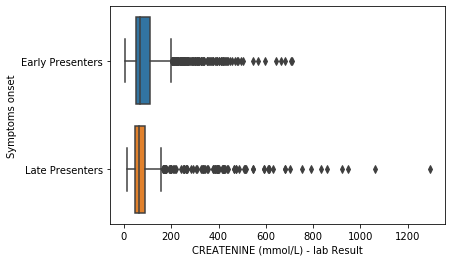

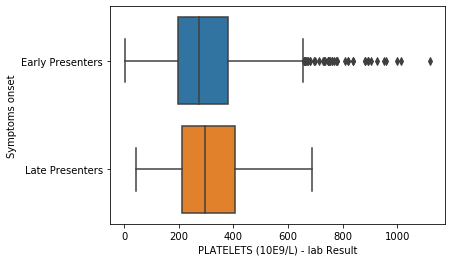

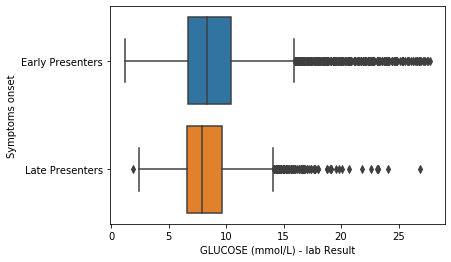

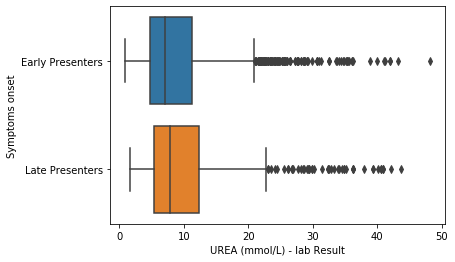

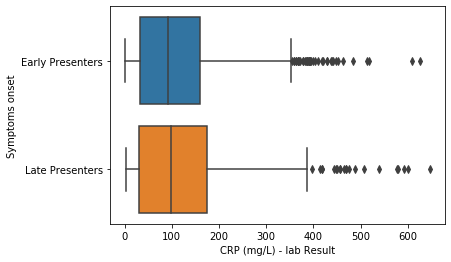

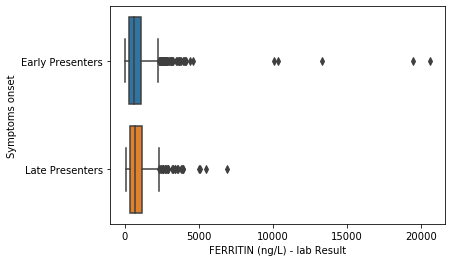

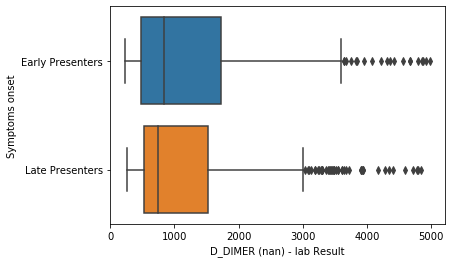

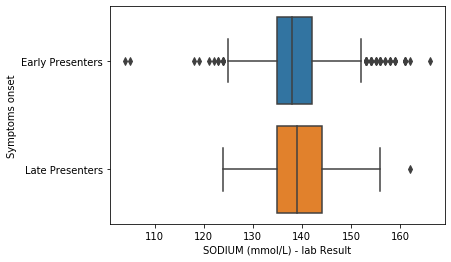

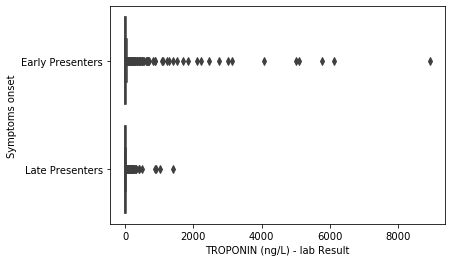

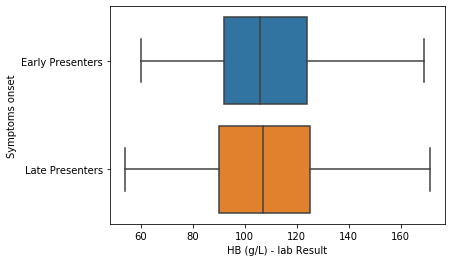

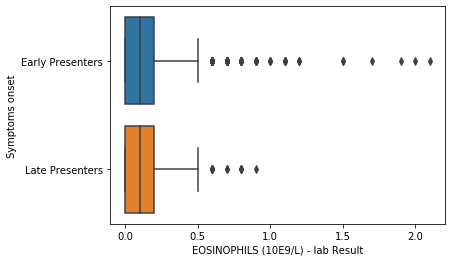

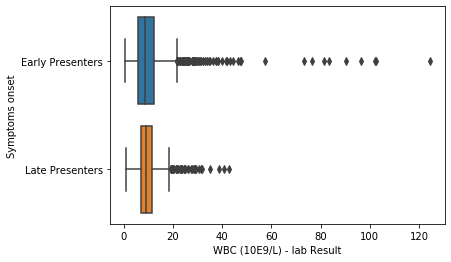

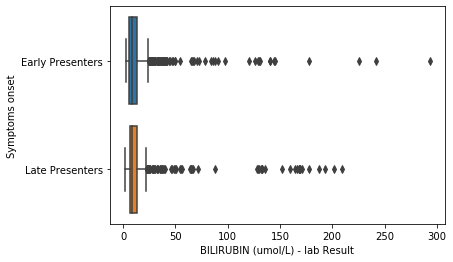

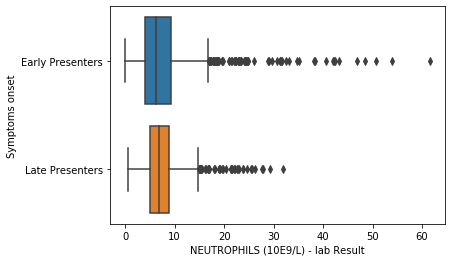

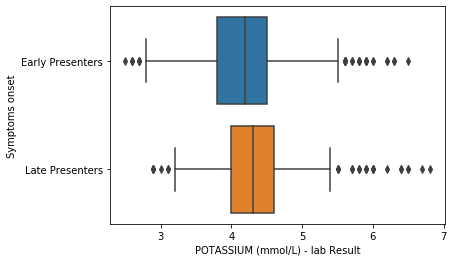

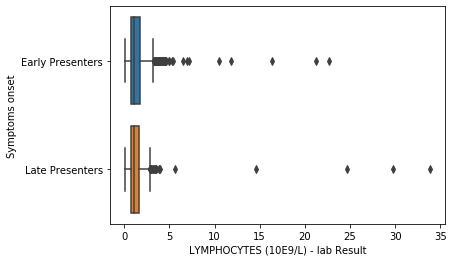

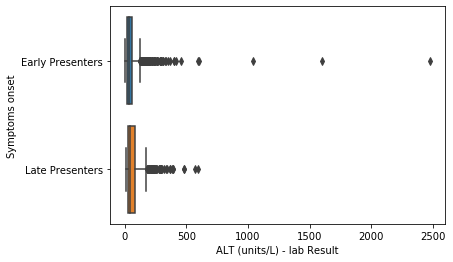

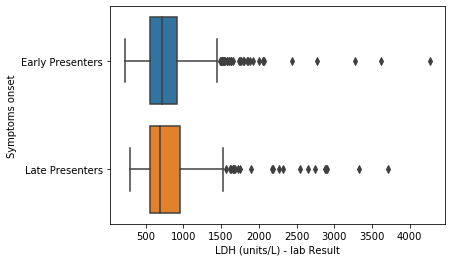

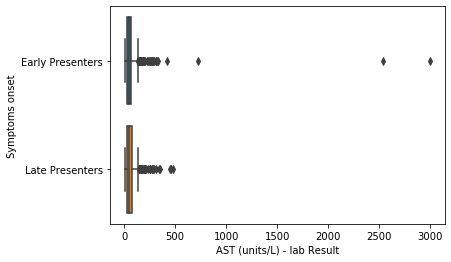

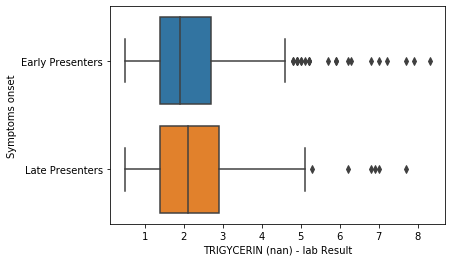

In [744]:
for labName in labParNames:
    print(labName)
    labName
    mapLabR = dfLabAllSelNoUnknownHospitals['REACT_TESTCODE']==labName
    dfAlt = dfLabAllSelNoUnknownHospitals[mapLabR]
    # mean = dfAlt["PATHOLOGY_RESULT_NUMERIC"].mean()
    # stdV = dfAlt["PATHOLOGY_RESULT_NUMERIC"].std()
    grp2 = dfAlt.groupby('Symptoms onset').agg(Mean_Lab = ("PATHOLOGY_RESULT_NUMERIC",'mean'),Std_Lab = ("PATHOLOGY_RESULT_NUMERIC",'std'))
    print(grp2.to_markdown)
    print("====================================================")
    print(grp2)
    print("====================================================")
    # print(f"mean = {mean}")
    # print(f"std = {stdV}")
    unitName = ""
    if len(dfAlt['UNIT'])>0:
        unitName = dfAlt['UNIT'].iloc[0]
    sns.boxplot(data=dfAlt, y='Symptoms onset',x="PATHOLOGY_RESULT_NUMERIC")
    plt.xlabel(f"{labName} ({unitName}) - lab Result")
    plt.show()


In [745]:
def is_nan(x):
    return (x is np.nan or x != x)


In [746]:
labParNames[-1]

'TRIGYCERIN'

In [747]:
is_nan(labParNames[-1])

False

In [748]:
is_nan(labParNames[1])

False

#### Loop table maker

In [763]:
# create table
def is_nan(x):
    return (x is np.nan or x != x)

outTable = pd.DataFrame(columns=['PARAMETER','LATE','EARLY'])
print("====================================================")
for labName in labParNames:
    if not is_nan(labName):
        # print(labName)
        labName
        unitName = ""
        mapLabR = dfLabAllSelNoUnknownHospitals['REACT_TESTCODE']==labName
        dfAlt = dfLabAllSelNoUnknownHospitals[mapLabR]
        if len(dfAlt['UNIT'])>0:
            unitName = dfAlt['UNIT'].iloc[0]
        # mean = dfAlt["PATHOLOGY_RESULT_NUMERIC"].mean()
        # stdV = dfAlt["PATHOLOGY_RESULT_NUMERIC"].std()
        grp2 = dfAlt.groupby('Symptoms onset').agg(Mean_Lab = ("PATHOLOGY_RESULT_NUMERIC",'mean'),Std_Lab = ("PATHOLOGY_RESULT_NUMERIC",'std'))
        # ------------------------------------------------
        lpMean = grp2.loc['Late Presenters','Mean_Lab']
        lpStd = grp2.loc['Late Presenters','Std_Lab']
        # ------------------------------------------------
        epMean = grp2.loc['Early Presenters','Mean_Lab']
        epStd = grp2.loc['Early Presenters','Std_Lab']
        # ------------------------------------------------
        # print(f"lpMean = {lpMean}")
        # print(f"lpStd = {lpStd}")
        # print(grp2.index)
        # print("----------------------------------------------------")
        # print(grp2.info)
        # print("----------------------------------------------------")
        # lpMean = grp2.loc['Late Presenters ','Mean_Lab']
        # print(lpMean)
        # print(grp2)
        # print("----------------------------------------------------")
        # print(grp2.columns)
        # print("====================================================")
        outTable = outTable.append({'PARAMETER': f"{labName} ({unitName})",'LATE':f"{lpMean:0.0f} ({lpStd:0.0f})",
                                    'EARLY':f"{epMean:0.0f} ({epStd:0.0f})"}, ignore_index=True)
        # print("Dataframe Contens ", outTable, sep='\n')
        # print("====================================================")
        # outTable.head()
print(outTable)
dirOut = "C:\Work\DropBoxPS\Dropbox\dev\data\dECMT\COVID19_SH\Outputs_covid\Manuscript Covid 20_10"
fnOut = f"lab_results_mean_std_TAble{timeStampStr}.csv"
p = Path(dirOut)
p.mkdir(parents=True, exist_ok=True)
fpOut = p / fnOut
outTable.to_csv(fpOut,index=False)
print("====================================================")

               PARAMETER         LATE        EARLY
0    CREATENINE (mmol/L)    105 (137)      95 (84)
1     PLATELETS (10E9/L)    313 (138)    303 (155)
2       GLUCOSE (mmol/L)        8 (2)        9 (4)
3          UREA (mmol/L)       10 (7)        9 (7)
4             CRP (mg/L)    124 (115)     111 (94)
5        FERRITIN (ng/L)    899 (826)   922 (1384)
6          D_DIMER (nan)  1198 (1032)  1205 (1005)
7        SODIUM (mmol/L)      140 (6)      139 (6)
8        TROPONIN (ng/L)     33 (107)    119 (596)
9               HB (g/L)     108 (22)     108 (21)
10  EOSINOPHILS (10E9/L)        0 (0)        0 (0)
11          WBC (10E9/L)       10 (5)       10 (9)
12    BILIRUBIN (umol/L)      16 (27)      13 (19)
13  NEUTROPHILS (10E9/L)        8 (4)        8 (6)
14    POTASSIUM (mmol/L)        4 (1)        4 (1)
15  LYMPHOCYTES (10E9/L)        1 (2)        1 (1)
16         ALT (units/L)      70 (74)     57 (104)
17         LDH (units/L)    804 (414)    786 (375)
18         AST (units/L)      6